<a href="https://colab.research.google.com/github/Walkhie/Exploring-Mental-Health-Data/blob/main/1)Preparacion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Librerias Basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Librerías para el Pipe
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, OneHotEncoder

In [ ]:
# Lectura de los datos de entrenamiento
train = pd.read_csv('train.csv')
train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


## Exploracion de los datos

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [ ]:
train.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


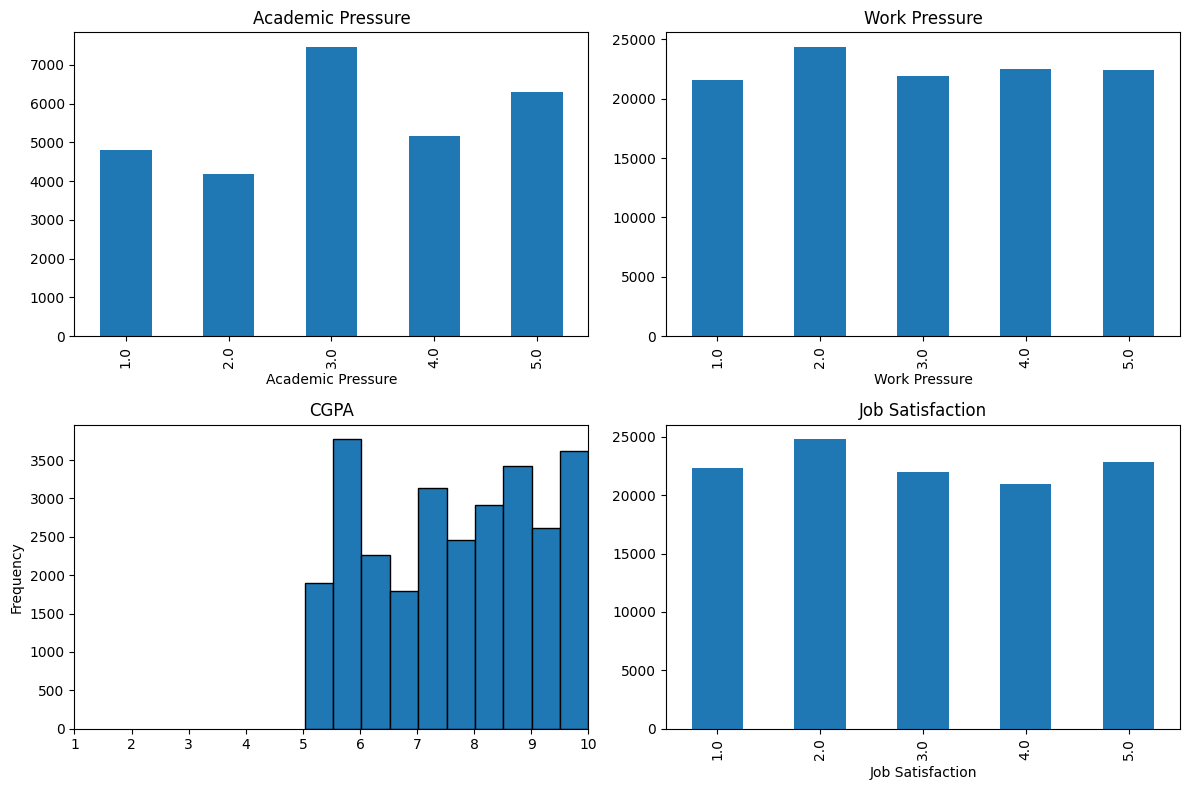

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Grafica de Academic Pressure
train['Academic Pressure'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Academic Pressure')

# Grafica de Work Pressure
train['Work Pressure'].value_counts().sort_index().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Work Pressure')

# Grafica de CGPA
train['CGPA'].plot(kind='hist', bins=10, ax=axes[1, 0], edgecolor='black')
axes[1, 0].set_title('CGPA')
axes[1, 0].set_xlim(1, 10)  # Limitar el rango de 1 a 10


# Grafica de Job Satisfaction
train['Job Satisfaction'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Job Satisfaction')

plt.tight_layout()
plt.show()

In [ ]:
print(f"[{train['CGPA'].min()},{train['CGPA'].max()}]")

[5.03,10.0]


<Axes: xlabel='Age'>

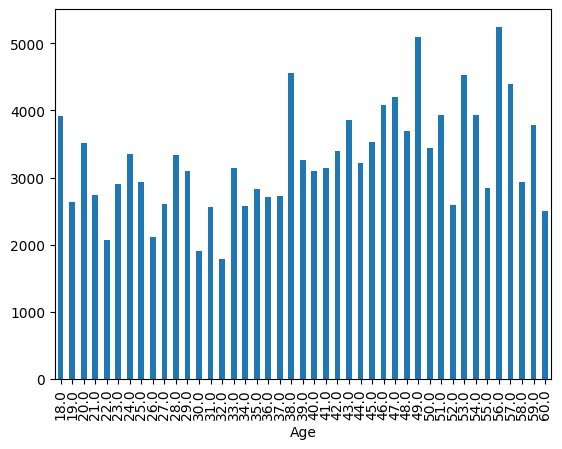

In [ ]:
train['Age'].value_counts().sort_index().plot(kind='bar')

### Datos NULOS en Academic Pressure,CGPA y Study Satisfaction

In [ ]:
#Se observa que hay muchos datos nulos en academic Pressure, CGPA, Study Satisfactiomn
# Vamos a ver cuantos nulos tienen
print(f" Academic Pressure Nulls: {sum(train['Academic Pressure'].isna())}")
print(f" Academic Pressure Nulls: {sum(train['Study Satisfaction'].isna())}")
print(f" Academic Pressure Nulls: {sum(train['CGPA'].isna())}")

 Academic Pressure Nulls: 112803
 Academic Pressure Nulls: 112803
 Academic Pressure Nulls: 112802


In [ ]:
# Vamos a filtar los registros que tienen datos nulos en las columnas
# Academic Pressure, Study Satisfaction y CGPA
mask = train[['Academic Pressure', 'Study Satisfaction', 'CGPA']].isnull().any(axis=1)
null_df = train[mask]
null_df.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0


In [ ]:
# Observamos si la razon por la que estan nulos los datos es pq son trabajadores
null_df['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Working Professional,112794
Student,14


### Datos nulos en Job Satisfaction, Profession y Work Pressure

In [ ]:
#Se observa que hay muchos datos nulos en
# Vamos a ver cuantos nulos tienen
print(f" Job Satisfaction Nulls: {sum(train['Job Satisfaction'].isna())}")
print(f" Profession Nulls: {sum(train['Profession'].isna())}")
print(f" Work Pressure Nulls: {sum(train['Work Pressure'].isna())}")

 Job Satisfaction Nulls: 27910
 Profession Nulls: 36630
 Work Pressure Nulls: 27918


In [ ]:
# Vamos a filtar los registros que tienen datos nulos en las columnas
# Job Satisfaction, Profession y Work Pressure
mask = train[['Job Satisfaction', 'Profession', 'Work Pressure']].isnull().any(axis=1)
null_df2 = train[mask]
null_df2.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1


In [ ]:
# Se obseva que en 27901 de los casos de nulos, es porque son estudiantes y estas columnas no aplican para ellos
null_df2['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
Student,27901
Working Professional,8765


## Pandas Profiling

In [ ]:
# Correccion de tipo
train['Academic Pressure'] = pd.to_numeric(train['Academic Pressure'], errors='coerce').astype(pd.Int64Dtype())
train['Age'] = pd.to_numeric(train['Age'], errors='coerce').astype(pd.Int64Dtype())
train['Work Pressure'] = pd.to_numeric(train['Work Pressure'], errors='coerce').astype(pd.Int64Dtype())
train['Study Satisfaction'] = pd.to_numeric(train['Study Satisfaction'], errors='coerce').astype(pd.Int64Dtype())
train['Job Satisfaction'] = pd.to_numeric(train['Job Satisfaction'], errors='coerce').astype(pd.Int64Dtype())

categorical_cols = ['Name','Gender', 'City', 'Working Professional or Student', 'Profession',
                    'Sleep Duration', 'Dietary Habits', 'Degree',
                    'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in categorical_cols:
    train[col] = train[col].astype('category')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   id                                     140700 non-null  int64   
 1   Name                                   140700 non-null  category
 2   Gender                                 140700 non-null  category
 3   Age                                    140700 non-null  Int64   
 4   City                                   140700 non-null  category
 5   Working Professional or Student        140700 non-null  category
 6   Profession                             104070 non-null  category
 7   Academic Pressure                      27897 non-null   Int64   
 8   Work Pressure                          112782 non-null  Int64   
 9   CGPA                                   27898 non-null   float64 
 10  Study Satisfaction                     27897

In [ ]:
# Cargar librería para Profiling
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=35196de229608562dbda95eba0f30cfb78f021210dc6ffa4a18fb9ae79703fb3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile_data=ProfileReport(train, minimal=True) # minimal=False
profile_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Ajuste de los Datos


En nuestros datos encontramos dos tipos de perfiles: estudiantes y trabajadores. En algunas columnas tenemos informacion unicamente relevante para uno de estos dos perfiles, por lo tanto, cuando no aplica se encuentra un dato nulo, para fines de visualizacion en las columnas Academic Pressure, Study Satisfaction y CGPA se imputara con un valor de -1, conociendo que estas columnas van de 0 a 5, siendo el -1 el valor que va a representar la no aplicabilidad.

Tambien encontramos variables como 'Sleep Duration' y 'Dietary habits' que se pueden simplificar en 3 categorias (que son las de mayor frecuencia), por lo tanto, se van a intentar llevar todas las demas categorias a una de las 3 principales, si no es posible se colocara el valor Nulo para que despues sea  imputado.

Finalmente para terminar de ajustar nuestros datos encontramos las columnas 'Degree' y 'Profession'que tienen mucha variabilidad, asi que vamos a dejar las categorias con mayor frecuencia, colocando un threshold de 5000 que es uno adecuado para la gran cantidad de datos que contiene la base de datos.

In [ ]:

# Funcion que imputara a lo que llamamos nulos con sentido
def ajustedData(df : pd.DataFrame) -> pd.DataFrame:

    ## Vamos inputar en Academic Pressure, Study Satisfaction y CGPA -1 en donde "Working Professional or Student" sea igual a
    ## Working Professional, de esta manera se interpretara que no aplica

    # Filtramos por los datos nulos en las columnas
    null_mask = df[['Academic Pressure', 'Study Satisfaction', 'CGPA']].isnull().any(axis=1)

    # Juntamos el condicion de null_mask con la de Student
    student_null_mask = (df['Working Professional or Student'] == 'Working Professional') & null_mask

    # Imputamos donde se cumpla ambas condiciones
    df.loc[student_null_mask, ['Academic Pressure', 'Study Satisfaction', 'CGPA']] = -1

    ## Vamos inputar en Job Satisfaction y Work Pressure -1 en donde "Working Professional or Student" sea igual a
    ## Student, de esta manera se interpretara que no aplica

    # Filtramos por los datos nulos en las columnas
    null_mask2 = df[['Job Satisfaction', 'Work Pressure', 'Profession']].isnull().any(axis=1)

    # Juntamos el condicion de null_mask con la de Student
    student_null_mask2 = (df['Working Professional or Student'] == 'Student') & null_mask2

    # Imputamos donde se cumpla ambas condiciones
    df.loc[student_null_mask2, ['Job Satisfaction', 'Work Pressure']] = -1

    ## Para Profession vamos imputar con "Student"  en donde "Working Professional or Student" sea igual a
    ## Student

    # Imputamos donde se cumpla ambas condiciones
    df.loc[student_null_mask2, ['Profession']] = 'Student'

    return df

In [ ]:
# Función para clasificar la duración del sueño en 3 categorías
def categorizar_sueño(duracion):
  if isinstance(duracion, str):
    duracion = duracion.lower()
    if 'no' in duracion or duracion in ['pune', 'indore', 'sleep_duration', 'unhealthy', 'work_study_hours', 'moderate']:
        return np.nan  # Asignar nulo  los valores ambiguos
    elif any(h in duracion for h in ['less than 5 hours', '3-4', '2-3', '4-5', '1-6', '1-2', '1-3']):
        return 'Less than 5 hours'
    elif any(h in duracion for h in ['5-6', '6-7', '7-8', '6-8', '8 hours', '5-8']):
        return '5-8 hours'
    elif any(h in duracion for h in ['more than 8', '9-11', '10-11', '8-9']):
        return 'More than 8 hours'
    else:
        return np.nan  # Para valores numéricos que no caen en las categorías de sueño

  # Asigna nulo  a valores no reconocidos
  return np.nan


# Transformador para aplicar la función sobre la columna "Sleep Duration"
def transformar_sueño(df):
    df['Sleep Duration'] = df['Sleep Duration'].apply(categorizar_sueño)
    return df


In [ ]:
def categorizar_dieta(habito):
    # Verifica si 'habito' es una cadena antes de proceder
    if isinstance(habito, str):
        habito = habito.lower()
        if 'unhealthy' in habito:
            return 'Unhealthy'
        elif 'healthy' in habito:
            if 'less' in habito or 'no' in habito or 'less than' in habito:
                return 'Moderate'
            elif 'more' in habito:
                return 'Healthy'
            else:
                return 'Healthy'
        elif 'moderate' in habito:
            return 'Moderate'
    # Asigna nulo  a valores no reconocidos
    return np.nan

# Transformador para aplicar la función de categorización
def transformar_dieta(df):
    df['Dietary Habits'] = df['Dietary Habits'].apply(categorizar_dieta)
    return df

In [ ]:
def reduccion_categorias(df, threshold = 5000):
  # Agrupar categorías poco frecuentes en "Others"
  # Obtener categorías que superan el umbral
    frequent_degrees = df['Degree'].value_counts()[lambda x: x > threshold].index
    frequent_professions = df['Profession'].value_counts()[lambda x: x > threshold].index

    # Usar .map() para asignar 'Other' a las categorías menos frecuentes
    df['Degree'] = df['Degree'].map(lambda x: x if x in frequent_degrees else 'Other')
    df['Profession'] = df['Profession'].map(lambda x: x if x in frequent_professions else 'Other')

    return df



In [ ]:
# Aplicamos las funciones de ajuste a nuestros datos
trainAjusted = ajustedData(train)
trainAjusted = transformar_sueño(trainAjusted)
trainAjusted = transformar_dieta(trainAjusted)
trainAjusted = reduccion_categorias(trainAjusted)
trainAjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   id                                     140700 non-null  int64   
 1   Name                                   140700 non-null  category
 2   Gender                                 140700 non-null  category
 3   Age                                    140700 non-null  Int64   
 4   City                                   140700 non-null  category
 5   Working Professional or Student        140700 non-null  category
 6   Profession                             140700 non-null  object  
 7   Academic Pressure                      140691 non-null  Int64   
 8   Work Pressure                          140680 non-null  Int64   
 9   CGPA                                   140691 non-null  float64 
 10  Study Satisfaction                     14069

## Preparacion de Datos

In [ ]:
trainAjusted = trainAjusted.drop(['id','Name'], axis = 1)
trainAjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   Gender                                 140700 non-null  category
 1   Age                                    140700 non-null  Int64   
 2   City                                   140700 non-null  category
 3   Working Professional or Student        140700 non-null  category
 4   Profession                             140700 non-null  object  
 5   Academic Pressure                      140691 non-null  Int64   
 6   Work Pressure                          140680 non-null  Int64   
 7   CGPA                                   140691 non-null  float64 
 8   Study Satisfaction                     140690 non-null  Int64   
 9   Job Satisfaction                       140683 non-null  Int64   
 10  Sleep Duration                         14067

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['Gender','Working Professional or Student', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness', 'Profession','Degree']
numeric_cols = ['Age','Academic Pressure','CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Work Pressure']

In [ ]:
#Paso 1: Limpiar atípicos
def eliminar_outliers(X):
    #Se asigna valor nulo a los atípicos
    X.loc[~X["Academic Pressure"].isin([1, 2, 3, 4, 5, -1]), "Academic Pressure"] = np.nan
    X.loc[~X["CGPA"].isin([0,1,2,3,4,5,6,7,8,9,10,-1]), "CGPA"] = np.nan
    X.loc[~X["Work Pressure"].isin([1, 2, 3, 4, 5, -1]), "Work Pressure"] = np.nan
    X.loc[~X["Study Satisfaction"].isin([1, 2, 3, 4, 5, -1]), "Study Satisfaction"] = np.nan
    X.loc[~X["Job Satisfaction"].isin([1, 2, 3, 4, 5, -1]), "Job Satisfaction"] = np.nan
    X.loc[~X["Financial Stress"].isin([1, 2, 3, 4, 5]), "Financial Stress"] = np.nan
    X.loc[~X['Sleep Duration'].isin(['Less than 5 hours', '5-8 hours', 'More than 8 hours']), 'Sleep Duration'] = np.nan
    X.loc[~X['Dietary Habits'].isin(['Healthy', 'Unhealthy', 'Moderate']), 'Dietary Habits'] = np.nan
    X.loc[~X['Degree'].isin(['Other', 'Class 12', 'B.Ed','B.Arch','B.Com','B.Pharm', 'BCA', 'M.Ed', 'MCA', 'BBA', 'BSc']), 'Degree'] = np.nan
    X.loc[~X['Profession'].isin(['Other', 'Teacher', 'Student','Content Writer']), 'Profession'] = np.nan
    X.loc[~X['Have you ever had suicidal thoughts ?'].isin(['Yes','No']), 'Have you ever had suicidal thoughts ?'] = np.nan
    X.loc[~X['Family History of Mental Illness'].isin(['Yes','No']), 'Family History of Mental Illness'] = np.nan
    return X
# Limpiar atipicos de todas las variables. Tenga o no  atipicos en este momento.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Función para imputar valores faltantes en columnas numéricas
def imputar_numericos(df, columnas, estrategia='mean'):
    imputer = SimpleImputer(strategy=estrategia)
    df[columnas] = imputer.fit_transform(df[columnas])
    return df

# Función para escalar columnas numéricas con MinMaxScaler
def escalar_numericos(df, columnas):
    scaler = MinMaxScaler()
    df[columnas] = scaler.fit_transform(df[columnas])
    return df

# Función para imputar valores faltantes en columnas categóricas
def imputar_categoricos(df, columnas):
    imputer = SimpleImputer(strategy='most_frequent')
    df[columnas] = imputer.fit_transform(df[columnas])
    return df

# Función para convertir variables categóricas en variables dummy
def crear_dummies(df, columnas):
    encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)
    dummies = encoder.fit_transform(df[columnas])
    dummies_df = pd.DataFrame(dummies, columns=encoder.get_feature_names_out(columnas))
    df = df.drop(columns=columnas)
    df = pd.concat([df, dummies_df.reset_index(drop=True)], axis=1)
    return df

# Función completa de preprocesamiento, con opciones para escalar
def preprocesar_datos(df, numeric_cols, categorical_cols, escalar=False):
    # Paso 1: Imputación de variables numéricas
    df = imputar_numericos(df, numeric_cols)

    # Paso 2: Escalar numéricos si está habilitado
    if escalar:
        df = escalar_numericos(df, numeric_cols)

    # Paso 3: Imputación de variables categóricas
    df = imputar_categoricos(df, categorical_cols)

    # Paso 4: Crear variables dummy para variables categóricas
    df = crear_dummies(df, categorical_cols)

    return df


In [ ]:
trainAjusted = eliminar_outliers(trainAjusted)
# Para usar el indice de cramer no tenemos que hacer dummies
trainAjusted= imputar_numericos(trainAjusted, numeric_cols)
trainAjusted= imputar_categoricos(trainAjusted, categorical_cols)

In [ ]:
trainAjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype   
---  ------                                 --------------   -----   
 0   Gender                                 140700 non-null  object  
 1   Age                                    140700 non-null  float64 
 2   City                                   140700 non-null  category
 3   Working Professional or Student        140700 non-null  object  
 4   Profession                             140700 non-null  object  
 5   Academic Pressure                      140700 non-null  float64 
 6   Work Pressure                          140700 non-null  float64 
 7   CGPA                                   140700 non-null  float64 
 8   Study Satisfaction                     140700 non-null  float64 
 9   Job Satisfaction                       140700 non-null  float64 
 10  Sleep Duration                         14070

## Correlaciones

* Para las asociaciones de nuestras variables categoricas vamos a utilizar el
indice de cramer para poder ver la correlacion entre ellas y con la variable objetivo de manera mas facil, sin embargo, tambien se usara la matrix de correlacion.

* Con las variables numericas lo haremos mediante la matriz de correlacion

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

### Relacion entre predictoras categoricas

In [ ]:
for i in categorical_cols:
  for j in categorical_cols:
    if i != j:
      print(f"Cramér's V para {i} y {j}:", cramers_v(trainAjusted[i], trainAjusted[j]))

Cramér's V para Gender y Working Professional or Student: 0.006639537136399918
Cramér's V para Gender y Sleep Duration: 0.0027529967254740686
Cramér's V para Gender y Dietary Habits: 0.038597279909857486
Cramér's V para Gender y Have you ever had suicidal thoughts ?: 0.010849685105658853
Cramér's V para Gender y Family History of Mental Illness: 0.015484635509747824
Cramér's V para Gender y Profession: 0.010684047638386358
Cramér's V para Gender y Degree: 0.022806993760306447
Cramér's V para Working Professional or Student y Gender: 0.006639537136399919
Cramér's V para Working Professional or Student y Sleep Duration: 0.024800302596576684
Cramér's V para Working Professional or Student y Dietary Habits: 0.052677698245495036
Cramér's V para Working Professional or Student y Have you ever had suicidal thoughts ?: 0.13766512812018705
Cramér's V para Working Professional or Student y Family History of Mental Illness: 0.013051675674251252
Cramér's V para Working Professional or Student y Pr

### Relacion con la variable Objetivo

In [ ]:
for i in categorical_cols:
  print(f"Cramér's V para {i} y 'Depression':", cramers_v(trainAjusted[i], trainAjusted['Depression']))

Cramér's V para Gender y 'Depression': 0.008125502901074229
Cramér's V para Working Professional or Student y 'Depression': 0.5207669282093113
Cramér's V para Sleep Duration y 'Depression': 0.08477398720186084
Cramér's V para Dietary Habits y 'Depression': 0.15169079284163797
Cramér's V para Have you ever had suicidal thoughts ? y 'Depression': 0.3490473924082207
Cramér's V para Family History of Mental Illness y 'Depression': 0.016483138485145498
Cramér's V para Profession y 'Depression': 0.5237169993525405
Cramér's V para Degree y 'Depression': 0.2968556715267167


### Matrix de Correlaciones

In [ ]:
## Despues de ver que city no tiene una asociacion significativa con la variable objetivo
## La eliminamos para reducir el numero de dummies y poder visualizar mejor la matrix
trainDummies = trainAjusted.drop('City', axis=1)
# Para hacer la matrix de correlacion necesitamos dummies
trainDummies = preprocesar_datos(trainDummies, numeric_cols, categorical_cols, escalar=False)

In [ ]:
# Correlacion de las variables numericas y la variable objetivo
df_numericas = trainDummies[numeric_cols + ['Depression']]
df_numericas.corr()

,Age,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Work Pressure,Depression
Age,1.000000,-0.552919,-0.066721,-0.545330,0.472022,-0.118356,-0.083587,0.410732,-0.564671
Academic Pressure,-0.552919,1.000000,0.108558,0.860433,-0.731639,0.123676,0.073734,-0.735465,0.582421
CGPA,-0.066721,0.108558,1.000000,0.103725,-0.088316,0.012354,0.012175,-0.088778,0.062272
Study Satisfaction,-0.545330,0.860433,0.103725,1.000000,-0.728508,0.103245,0.038925,-0.732317,0.451676
Job Satisfaction,0.472022,-0.731639,-0.088316,-0.728508,1.000000,-0.107487,-0.057661,0.598584,-0.473681
Work/Study Hours,-0.118356,0.123676,0.012354,0.103245,-0.107487,1.000000,0.036133,-0.093171,0.191746
Financial Stress,-0.083587,0.073734,0.012175,0.038925,-0.057661,0.036133,1.000000,-0.028219,0.227232
Work Pressure,0.410732,-0.735465,-0.088778,-0.732317,0.598584,-0.093171,-0.028219,1.000000,-0.323459
Depression,-0.564671,0.582421,0.062272,0.451676,-0.473681,0.191746,0.227232,-0.323459,1.000000


In [ ]:
correlation_matrix = trainDummies.corr()
correlation_matrix

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_BBA,Degree_BCA,Degree_BSc,Degree_Class 12,Degree_M.Ed,Degree_MCA,Degree_Other
Age,1.000000,-0.552919,0.410732,-0.066721,-0.545330,0.472022,-0.118356,-0.083587,-0.564671,-0.006890,...,0.005311,0.059798,0.021271,0.032980,-0.022545,0.022208,-0.402305,0.062057,0.025567,0.141590
Academic Pressure,-0.552919,1.000000,-0.735465,0.108558,0.860433,-0.731639,0.123676,0.073734,0.582421,0.002771,...,-0.008908,-0.027872,-0.028653,-0.028249,0.024453,-0.011602,0.189945,-0.027372,-0.003686,-0.058741
Work Pressure,0.410732,-0.735465,1.000000,-0.088778,-0.732317,0.598584,-0.093171,-0.028219,-0.323459,-0.005864,...,0.001169,0.009466,0.021683,0.018365,-0.024807,0.005564,-0.108590,0.009862,-0.003114,0.050366
CGPA,-0.066721,0.108558,-0.088778,1.000000,0.103725,-0.088316,0.012354,0.012175,0.062272,-0.006951,...,0.000450,-0.002753,-0.005150,-0.003119,0.001848,0.004901,0.022496,-0.001755,0.003626,-0.009448
Study Satisfaction,-0.545330,0.860433,-0.732317,0.103725,1.000000,-0.728508,0.103245,0.038925,0.451676,0.003653,...,-0.007491,-0.028292,-0.029235,-0.028902,0.023876,-0.012386,0.182965,-0.026349,-0.000475,-0.055180
Job Satisfaction,0.472022,-0.731639,0.598584,-0.088316,-0.728508,1.000000,-0.107487,-0.057661,-0.473681,-0.009570,...,0.004196,0.023680,0.023054,0.021623,-0.016867,0.007923,-0.142269,0.013528,0.004300,0.046148
Work/Study Hours,-0.118356,0.123676,-0.093171,0.012354,0.103245,-0.107487,1.000000,0.036133,0.191746,0.006957,...,-0.005364,-0.012609,0.003364,-0.017791,-0.000029,-0.003182,0.046672,-0.009701,0.000365,-0.012326
Financial Stress,-0.083587,0.073734,-0.028219,0.012175,0.038925,-0.057661,0.036133,1.000000,0.227232,-0.008022,...,-0.007110,-0.010041,-0.010283,0.000228,0.003310,0.000200,0.049076,-0.012365,-0.007952,-0.014669
Depression,-0.564671,0.582421,-0.323459,0.062272,0.451676,-0.473681,0.191746,0.227232,1.000000,0.008144,...,-0.016703,-0.041361,-0.033787,-0.023628,0.011848,-0.013055,0.293352,-0.044896,-0.017831,-0.094653
Gender_Male,-0.006890,0.002771,-0.005864,-0.006951,0.003653,-0.009570,0.006957,-0.008022,0.008144,1.000000,...,-0.002372,0.012081,0.001997,-0.010953,-0.001132,0.003797,0.003583,0.001266,0.008030,-0.002536


Despues de analizar las correlaciones se eliminan las siguientes variables:

*   Gender
*   Family of mental illness
*   Sleep Duration
*   CGPA
*   Study Satisfaction
*   Job Satisfaction
*   Working Professional or Student
*   Work Pressure



## PipeLine

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Paso 1: Imputación
class Imputacion(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return ajustedData(X)  # Función que realiza la imputación de datos nulos

# Paso 2: Transformación de Sueño
class TransformarSueño(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return transformar_sueño(X)  # Función que reduce las categorías de "Sleep Duration"

# Paso 3: Transformación de Dieta
class TransformarDieta(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return transformar_dieta(X)  # Función que reduce las categorías de "Dietary Habits"

# Paso 4: Reducir las categorias de Degree y Profession

class ReduccionCategorias(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return reduccion_categorias(X)  # Función que reduce las categorías de "Degree" y "Profession"

In [ ]:
# Definir las columnas categóricas y numéricas
categorical_cols = ['Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Profession','Degree']
numeric_cols = ['Age','Academic Pressure', 'Work/Study Hours', 'Financial Stress']


In [ ]:
# Variables Irrelevantes
def eliminar_variables_irrelevantes(df):
    return df.drop(['id','Name','Gender','Family History of Mental Illness','Sleep Duration','CGPA','Study Satisfaction','Job Satisfaction','Working Professional or Student','Work Pressure'], axis=1)

In [ ]:
#Paso 1: Limpiar atípicos
def eliminar_outliers(X):
    #Se asigna valor nulo a los atípicos
    X.loc[~X["Academic Pressure"].isin([1, 2, 3, 4, 5, -1]), "Academic Pressure"] = np.nan
    X.loc[~X["Financial Stress"].isin([1, 2, 3, 4, 5]), "Financial Stress"] = np.nan
    X.loc[~X['Dietary Habits'].isin(['Healthy', 'Unhealthy', 'Moderate']), 'Dietary Habits'] = np.nan
    X.loc[~X['Degree'].isin(['Other', 'Class 12', 'B.Ed','B.Arch','B.Com','B.Pharm', 'BCA', 'M.Ed', 'MCA', 'BBA', 'BSc']), 'Degree'] = np.nan
    X.loc[~X['Profession'].isin(['Other', 'Teacher', 'Student','Content Writer']), 'Profession'] = np.nan
    X.loc[~X['Have you ever had suicidal thoughts ?'].isin(['Yes','No']), 'Have you ever had suicidal thoughts ?'] = np.nan
    return X
# Limpiar atipicos de todas las variables. Tenga o no  atipicos en este momento.

In [ ]:
# Paso 2: Imputar y transformaciones

# Para variables numéricas: Imputar por media
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
])

# Para variables categóricas: imputar por moda y crear dummies
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('dummies', OneHotEncoder(drop='if_binary',handle_unknown='ignore', sparse_output=False))
])

# Unir los dos pasos anteriores
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

In [ ]:
# Definir el pipeline completo

pipe_preparacion = Pipeline(steps=[
    ('imputacion', Imputacion()),             # Paso 1: Imputacion de los datos nulos con sentido
    ('Categorizar Sueño', TransformarSueño() ),   # Paso 2: Reducir categorias de la variable "Sleep Duration"
    ('Categorizar Dieta', TransformarDieta()),     # Paso 3: Reducir categorias de la variable "Dietary Habits"
    ('Reduccion de categorias', ReduccionCategorias()),
    ('eliminar variables irrelevantes', FunctionTransformer(eliminar_variables_irrelevantes)),
    ('outliers', FunctionTransformer(eliminar_outliers)),
    ('Preprocesamiento', preprocessor)
])

pipe_preparacion

Pipeline(steps=[('imputacion', Imputacion()),
                ('Categorizar Sueño', TransformarSueño()),
                ('Categorizar Dieta', TransformarDieta()),
                ('Reduccion de categorias', ReduccionCategorias()),
                ('eliminar variables irrelevantes',
                 FunctionTransformer(func=<function eliminar_variables_irrelevantes at 0x78ff5ade1000>)),
                ('outliers',
                 FunctionTransformer(func=<function eliminar_outli...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummies',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Profession',
                                                   'Degree'])]))])

In [ ]:
# Para variables numéricas: Imputar por media y normalizar
num_transformer_norm = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

preprocessor_norm = ColumnTransformer(transformers=[
    ('num', num_transformer_norm, numeric_cols),
    ('cat', cat_transformer, categorical_cols)
])

In [ ]:
# Pipe Incluyendo Normalizacion
pipe_preparacion_norm = Pipeline(steps=[
    ('imputacion', Imputacion()),             # Paso 1: Imputacion de los datos nulos con sentido
    ('Categorizar Sueño', TransformarSueño() ),   # Paso 2: Reducir categorias de la variable "Sleep Duration"
    ('Categorizar Dieta', TransformarDieta()),     # Paso 3: Reducir categorias de la variable "Dietary Habits"
    ('Reduccion de categorias', ReduccionCategorias()),
    ('eliminar variables irrelevantes', FunctionTransformer(eliminar_variables_irrelevantes)),
    ('outliers', FunctionTransformer(eliminar_outliers)),
    ('Preprocesamiento', preprocessor_norm)
])

pipe_preparacion_norm

Pipeline(steps=[('imputacion', Imputacion()),
                ('Categorizar Sueño', TransformarSueño()),
                ('Categorizar Dieta', TransformarDieta()),
                ('Reduccion de categorias', ReduccionCategorias()),
                ('eliminar variables irrelevantes',
                 FunctionTransformer(func=<function eliminar_variables_irrelevantes at 0x78ff5ade1000>)),
                ('outliers',
                 FunctionTransformer(func=<function eliminar_outli...
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Academic Pressure',
                                                   'Work/Study Hours',
                                                   'Financial Stress']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummies',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Dietary Habits',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Profession',
                                                   'Degree'])]))])

In [ ]:
# Fit a los Pipe
X = train.drop('Depression', axis=1)
pipe_preparacion.fit(X)
pipe_preparacion_norm.fit(X)

#Se guarda el pipeline
import pickle
filename = 'pipe_preparacion.pkl'
pickle.dump(pipe_preparacion, open(filename, 'wb'))

filename = 'pipe_preparacion_norm.pkl'
pickle.dump(pipe_preparacion_norm, open(filename, 'wb'))